In [12]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import normaltest

In [2]:
data = dataset=pd.read_csv("/content/L2_data_group3.txt",delimiter="\t")

Null hypotheses: There is **no difference** in reaction time between before and after of comsumption of 100 ml of alcohol


Alternate hypotheses: There is **difference** in reaction time between before and after of comsumption of 100 ml of alcohol

In [3]:
data.head()

,Before,After
0,171.14,242.95
1,191.22,216.94
2,207.76,265.78
3,165.44,163.32
4,205.87,213.53


In [4]:
data.dtypes

Before    float64
After     float64
dtype: object

In [5]:
data.describe()

,Before,After
count,50.000000,50.000000
mean,198.082600,253.613200
std,26.693944,44.167379
min,132.040000,163.320000
25%,177.687500,227.572500
50%,196.485000,247.600000
75%,222.032500,267.550000
max,250.970000,443.140000


Performe Shapiro-Wilk test to check is data is normally distributed

Null hypothesis: Data is normally distributed

Alternative hypothesis: Data is not normally distributed

In [6]:
#after
stat, p = shapiro(data['After'])
stat, p

(0.889416515827179, 0.00021883791487198323)

In [14]:
#after
stat, p = normaltest(data['After'])
stat, p
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=29.588, p=0.000


Given W-value and p_val we can say that we reject the null hypotests

Data['After'] **IS NOT** normally distributed

In [10]:
#before
stat, p = shapiro(data['Before'])
stat, p

(0.9751520156860352, 0.3698491156101227)

In [15]:
#after
stat, p = normaltest(data['Before'])
stat, p
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.079, p=0.583


We fail to reject null hypothesis, so we assume data **IS** normally distributed

In [ ]:
data['sub'] = data['After'] - data['Before']

Box plot of data with outliers

Data shape: (50,3)
Blok z wcięciem




In [ ]:
import plotly.express as px
fig = px.box(data, y="sub")
fig.show()

As it can be observer, there is one outlier with value of 204.13 

In [ ]:
def tukey_outliers(df, column):
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1
  outlier_step = 1.5 * IQR
  outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
  return outliers_index

In [ ]:
outliers_index = tukey_outliers(data,'sub')

In [ ]:
data.drop(outliers_index, inplace=True)

In [ ]:
import plotly.express as px
fig = px.box(data, y="sub")
fig.show()

Box plot of data after detecting and dropping outlier. 


Shape of data:(49, 3)

---



In [ ]:
num_bins = math.sqrt(data.shape[0])

In [ ]:
fig = px.histogram(data, x="sub", nbins=int(num_bins))
fig.show()

By looking at the histogram we can draw conclusion that if data would be normally distirbuted it should have most of count in the middle, but it shows that more of count occurde to the left and right of mean value, so we can draw conclusion that data is not normally distributed

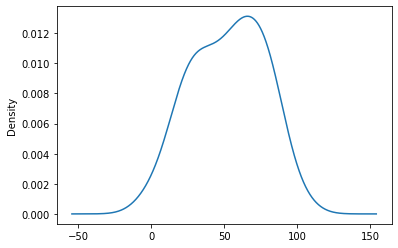

In [ ]:
data['sub'].plot.kde()

Because we are looking at the same group of people but in two different states we should use Paired t-test 

In [ ]:
from scipy import stats

ttest,pval = stats.ttest_rel(data['After'], data['Before'])

Let assume that alfa theshold value is equal to 0,05


In [ ]:
a = 0.05
print("Is a > p-val")
print(a > pval)

Is a > p-val
True
14.733878839440212


Based on p-val we can reject the null hypotheses. So it means that we can assume that there is difference bewteen before and after drinkin 100 ml of alcohol